In [27]:
import re
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy.ma as ma
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm, LogNorm
import os
BAD_VALUE = -999

In [28]:
def generate_dataset(name):
    
    with open("./datasets/" + name) as f:
      lines = f.readlines()[7:]

    rain_array = []
    
    for line in lines:

        split_line = re.split(r'[\t\n]',line.strip())[1:]
        
        if ("** line too long **" in split_line[-1]):
            split_line.pop()
        
        split_line = list(map(lambda x : float(x) , split_line))
        
        while (len(split_line) < 1440):
            split_line.append(BAD_VALUE)
        
        rain_array.append(split_line)

    return np.array(rain_array)

In [29]:
def continuous_plot(data, title, cmap, vmin = 0, vmax = 1):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}, figsize=(12, 8))

    cax = ax.imshow(data, origin='lower', cmap=cmap, extent=(-180,180,-90,90),transform=ccrs.PlateCarree(central_longitude=180),vmin=vmin, vmax=vmax)

    ax.add_feature(cfeature.COASTLINE)

    plt.colorbar(cax, ax=ax, orientation='vertical', label=title)

    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(title)
    ax.set_extent([0,300,-90,90],ccrs.PlateCarree())
    plt.show()

In [30]:
def discrete_plot(data, title, cmap_name, outlier_color, save_path=""):
    
    boundaries = [0,0.01,0.03,0.05,0.07,0.09,0.11,0.13,0.15,0.22,0.29,0.35,0.5,1,1.5,2,25]
    num_colors = len(boundaries) - 2
    cmap = plt.get_cmap(cmap_name) 
    colors = [cmap(i / num_colors) for i in range(num_colors)]
    colors.append(outlier_color)
    norm = BoundaryNorm(boundaries, len(colors))
    
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}, figsize=(12, 8))
    cmap = ListedColormap(colors)
    cax = ax.imshow(data, origin='lower', cmap=cmap, extent=(-180, 180, -90, 90), transform=ccrs.PlateCarree(central_longitude=180), norm=norm)
    plt.colorbar(cax, ax=ax, orientation='vertical', label=title)
    ax.add_feature(cfeature.COASTLINE)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(title)
    ax.set_extent([0, 300, -90, 90], ccrs.PlateCarree())
    plt.show()
    plt.close(fig)  # Close the figure to save memory
    if(save_path != ""):
        fig.savefig(save_path, format='png')
        return save_path

In [31]:
def log_plot(data, title, color_map):
    data = ma.masked_where(data.mask, data + 1e-10)
    norm = LogNorm()
    
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}, figsize=(12, 8))
    cax = ax.imshow(data, origin='lower', cmap=color_map, extent=(-180, 180, -90, 90), transform=ccrs.PlateCarree(central_longitude=180), norm=norm)
    plt.colorbar(cax, ax=ax, orientation='vertical', label=title)
    ax.add_feature(cfeature.COASTLINE)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(title)
    ax.set_extent([0, 300, -90, 90], ccrs.PlateCarree())

    plt.show()

# Loading the Data

In [32]:
files = ["1Apr2016.txt","10Apr2016.txt","20Apr2016.txt","30Apr2016.txt","10May2016.txt","20May2016.txt","30May2016.txt", "10Jun2016.txt","20Jun2016.txt","30Jun2016.txt"]
titles = ["Sea Surface Rain on 1 April 2016","Sea Surface Rain on 10 April 2016","Sea Surface Rain on 20 April 2016","Sea Surface Rain on 30 April 2016","Sea Surface Rain on 10 May 2016","Sea Surface Rain on 20 May 2016","Sea Surface Rain on 30 May 2016","Sea Surface Rain on 10 June 2016","Sea Surface Rain on 20 June 2016","Sea Surface Rain on 30 June 2016"]
masked_data = []
for i in range(len(files)):
    data_1 = generate_dataset(files[i])
    data_1 = ma.masked_where(data_1 == BAD_VALUE, data_1)
    masked_data.append((data_1,titles[i]))

# data now contains a list of tuples of the form : (2D data array, title for the corresponding data's plot)

## Continuous Color Map - Viridis

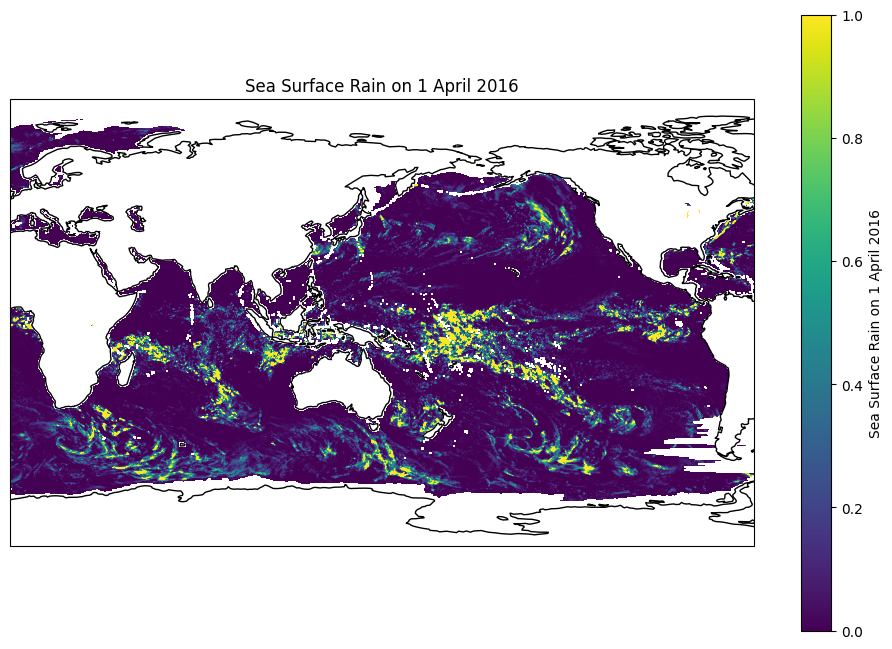

In [33]:
continuous_plot(masked_data[0][0], masked_data[0][1], "viridis")

## Discrete Color Map - Viridis

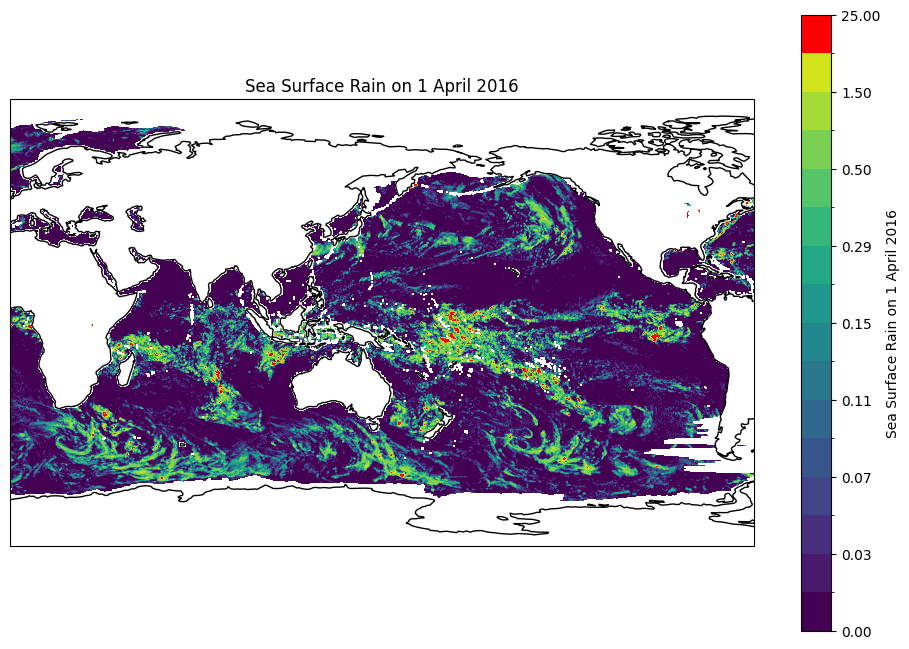

In [34]:
discrete_plot(masked_data[0][0], masked_data[0][1], "viridis", "red")

## Logarithmic Color Map - Viridis

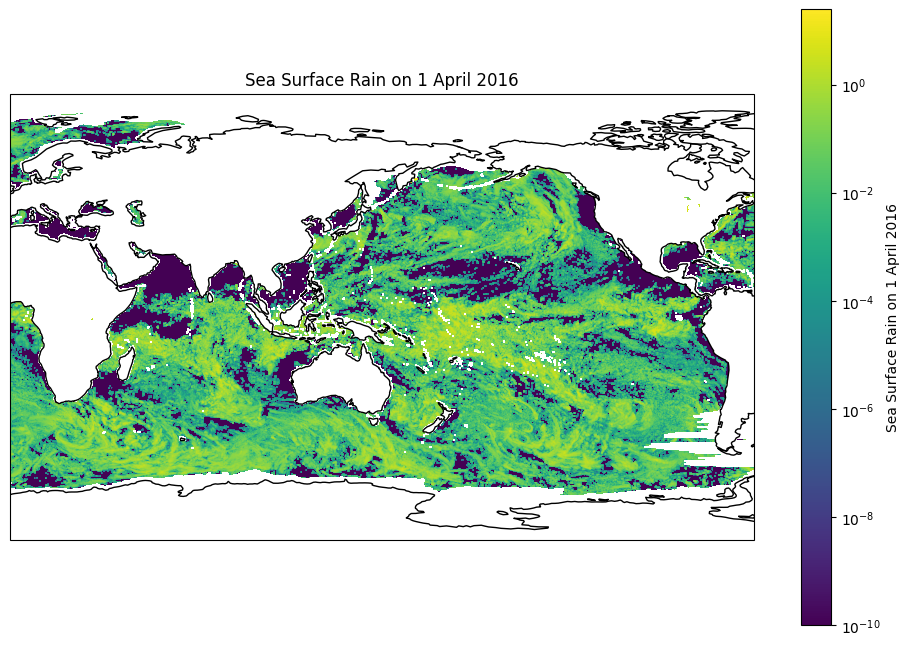

In [35]:
log_plot(masked_data[0][0], masked_data[0][1], "viridis")

## Trying out different color maps

### Perceptually uniform Sequential Color Maps

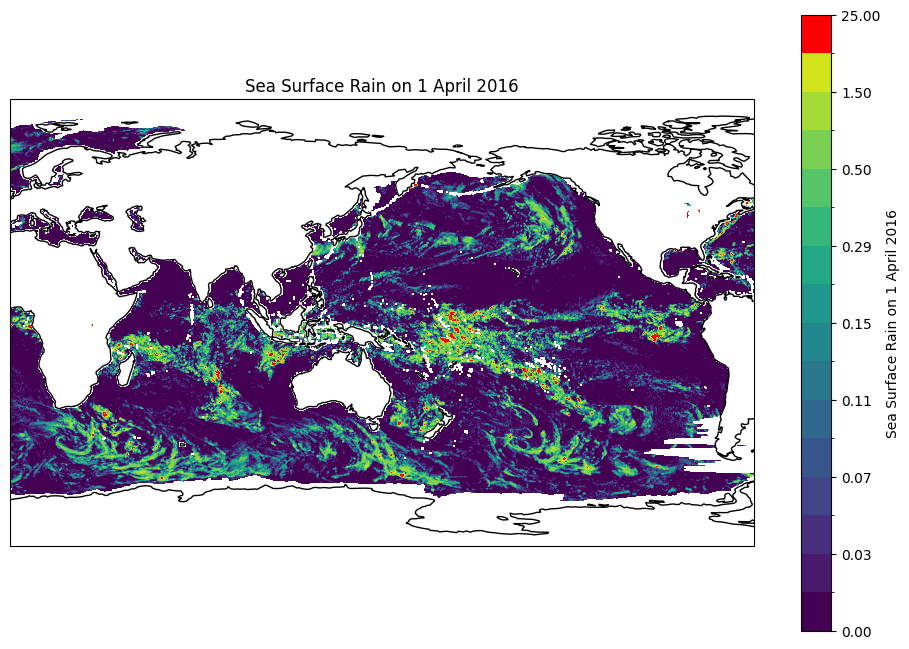

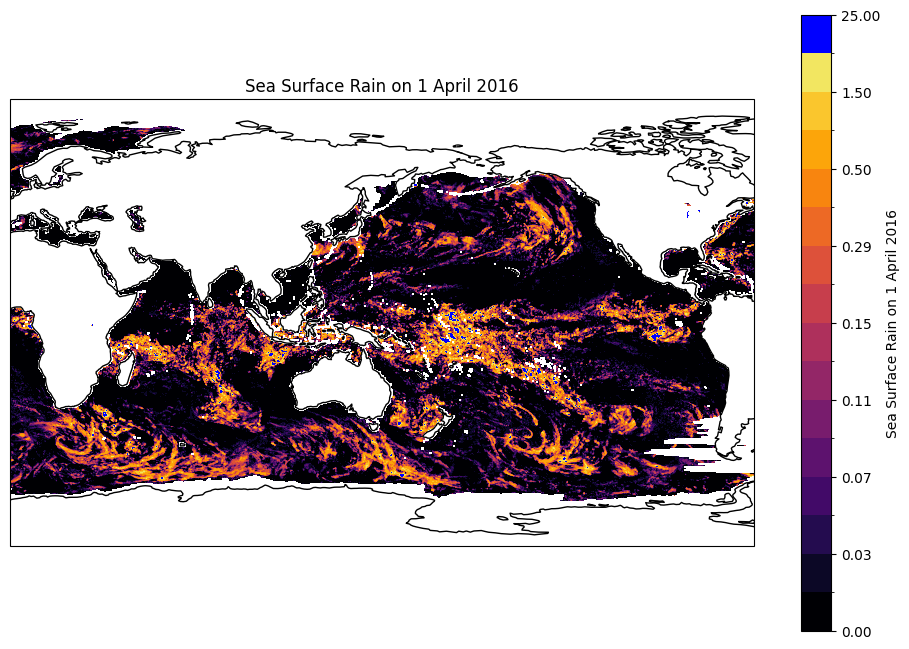

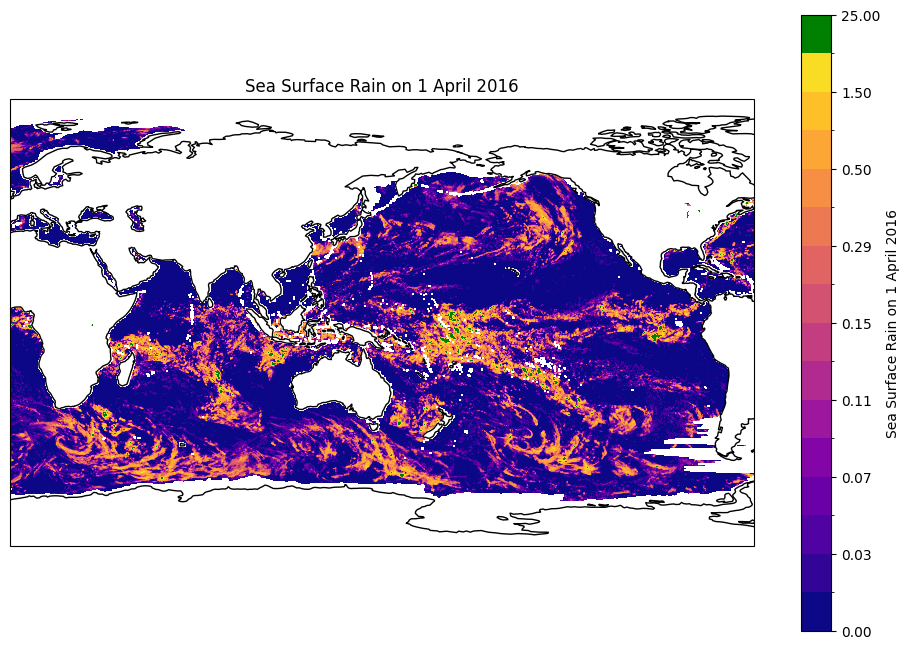

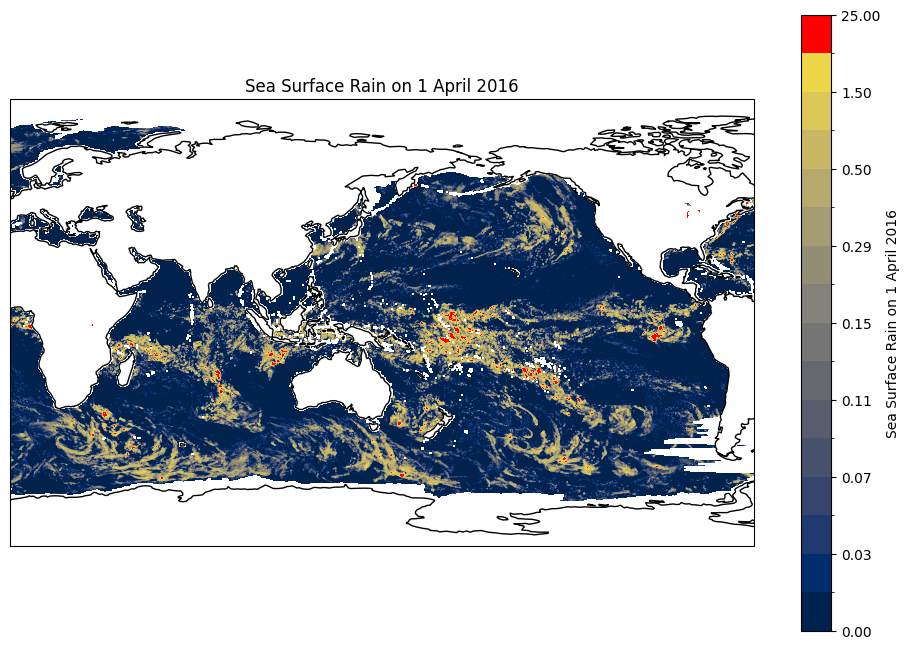

In [36]:
perceptual_cmaps = [("viridis","red"), ("inferno","blue"), ("plasma","green"), ("cividis","red")]
for cmap in perceptual_cmaps:
    discrete_plot(masked_data[0][0], masked_data[0][1], cmap[0], cmap[1])

### Sequential Color Maps

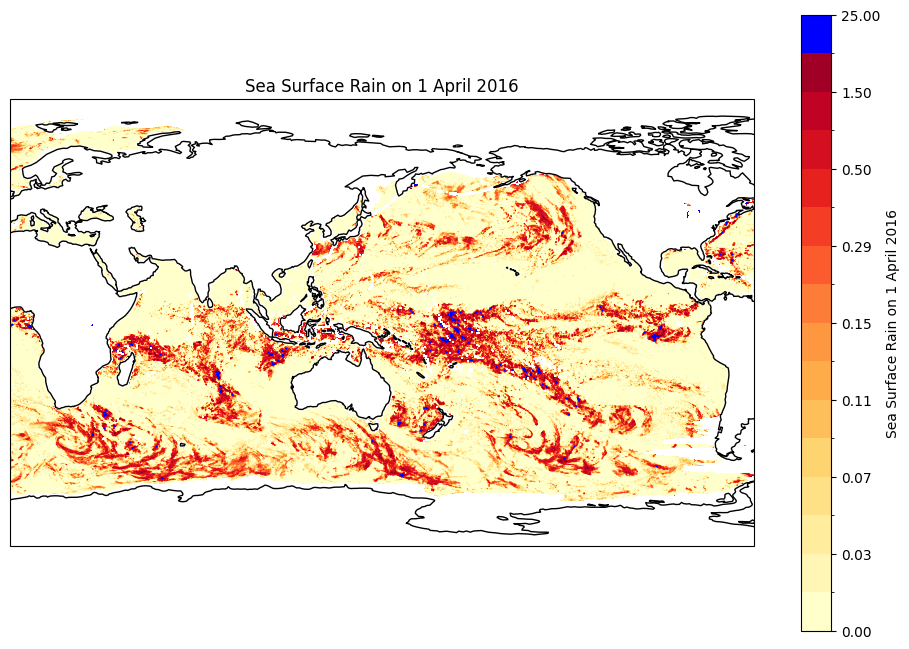

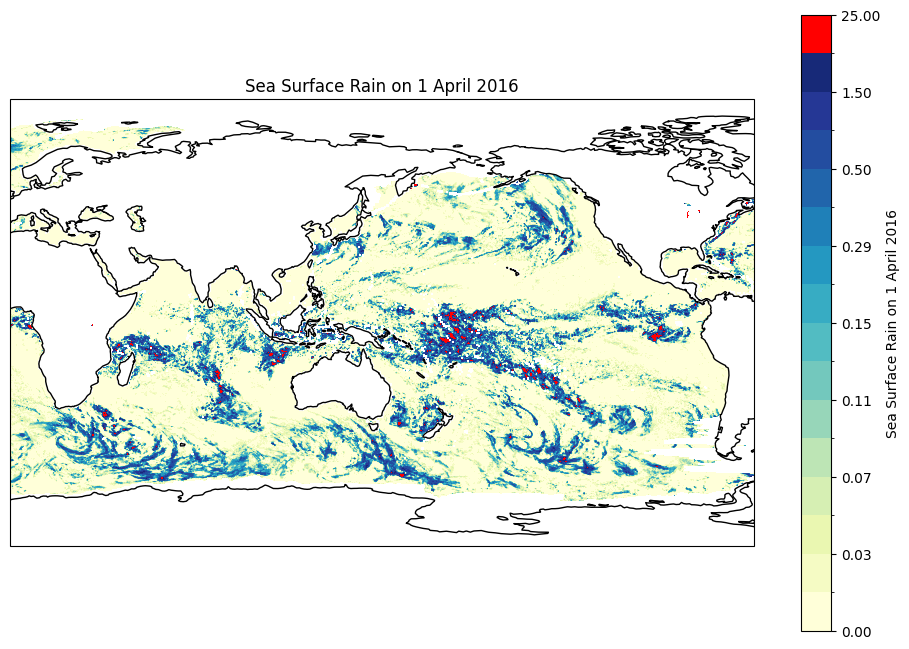

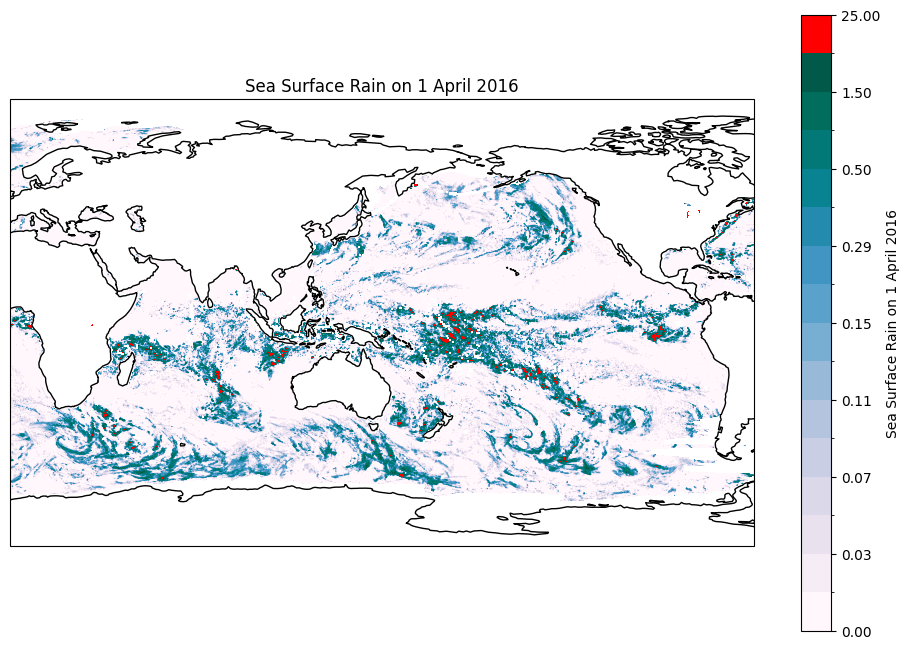

In [37]:
sequential_cmaps = [("YlOrRd","blue"), ("YlGnBu", "red"), ("PuBuGn", "red")]
for cmap in sequential_cmaps:
    discrete_plot(masked_data[0][0], masked_data[0][1], cmap[0], cmap[1])

### Diverging Color Maps

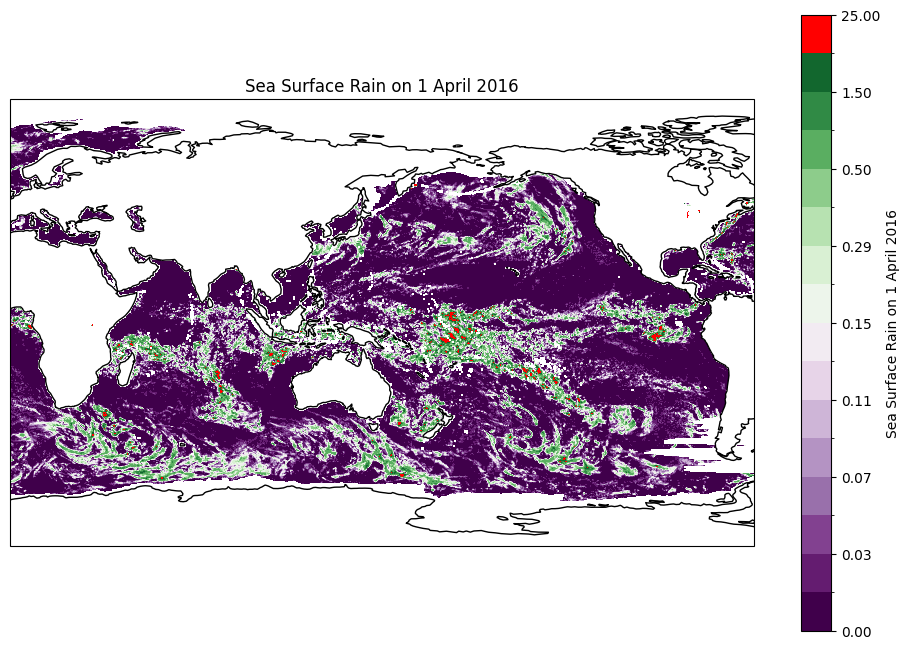

In [38]:
diverging_cmaps = [("PRGn","Red")]
for cmap in diverging_cmaps:
    discrete_plot(masked_data[0][0], masked_data[0][1], cmap[0], cmap[1])


In [39]:
# %%capture

# def generate_discrete_animation(colormap, outlier_color):
#     images = []
#     for i in range(len(masked_data)):
#         title = masked_data[i][1]
#         image_path = discrete_plot(masked_data[i][0], title, colormap, outlier_color, f'frame_{i + 1}.png')
#         images.append(image_path)
#     cmd = f'ffmpeg -y -framerate 1 -i frame_%d.png -c:v libx264 -pix_fmt yuv420p "animation_{colormap}.mp4"'
#     os.system(cmd)
#     for image in images:
#         os.remove(image)

# for i in perceptual_cmaps + sequential_cmaps + diverging_cmaps:
#     generate_discrete_animation(i[0], i[1])